201812 2018 evaluation vs GRL dataset

In [28]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [29]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [30]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean
import glob
import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline


## PSU to reference salinity
SR = (35.16504/35) g kg–1 * S

In [32]:
infil = loadtxt('../DATASETS/grl2016_edit2.txt')
infil_cor = loadtxt('../DATASETS/grl2016_nu.txt')

crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
mon = infil[:,4]
day = infil[:,5]
lat_or = infil[:,6]
lon_or = infil[:,7]
lat = infil_cor[:,6]
lon = infil_cor[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]

yr = np.zeros_like(mon)
yr[:] = 2014

 Reference Salinity of
the local seawater sample is then determined from the
Practical Salinity according to the simple formula
SR = (35.16504/35) g kg–1  S.

In [34]:
# day_of_year = datetime.now().timetuple().tm_yday
dts = []
yds = []
for i in range(0,len(mon)):
    tyr = yr[i]
    tmon = mon[i]
    tday = day[i]
    tdt = dt.datetime(int(tyr),int(tmon),int(tday))
    dts.append(tdt)
    yd = tdt.timetuple().tm_yday
    yds.append(yd)
    
yds_ar = np.array(yds)

In [36]:
dic[P<=5]

array([     nan,      nan,      nan,  1966.8 ,      nan,  1631.6 ,
            nan,  1376.57,      nan,  1897.62,      nan,  1884.42,
        1932.98,      nan,  1935.88,  1925.  ,  2096.2 ,  2107.05,
        2112.14,  2037.48,  2015.77,  1956.19,  1892.94,  1987.85,
        1679.3 ,  1683.08,      nan,  1972.29,  2016.75,  2085.93,
        1096.66,  1169.44,  1851.99,  2045.21,  1929.16,  2009.42,
        2079.95,  1809.32,  1794.93,  1934.46,      nan,  1668.51,
            nan,      nan,  1609.11,      nan,      nan,      nan,
            nan,      nan,  1045.96,  2046.92,      nan,      nan,
        2024.18,  1976.47,  1978.28,  2137.56,  1682.89,  1744.2 ,
        1912.2 ,      nan,  2017.18,  1576.03,  2096.91,  1528.07,
        1664.72,  1586.49,      nan,      nan,      nan,  1879.85,
            nan,  1848.67,      nan,  1848.96,      nan,  1168.78,
            nan,  1502.51,      nan,  1302.67,  1935.9 ,  1950.21,
            nan,  1902.16,  1457.54,      nan,  1509.22,  2110

In [37]:
dens = seawater.dens(S,T,P)
dic_conv=dic*dens/1000
alk_conv=alk*dens/1000

S_rs = S * 35.16504/35
S_psu= S_rs*35/35.16504

In [40]:
DIC = nc.Dataset('./extracted_ncs/DIC_fy_2018.nc')

DIC_mod = DIC['model_output']['mod_point'][:]
is_ref = DIC['model_output']['mod_x'][:]
js_ref = DIC['model_output']['mod_y'][:]

TA = nc.Dataset('./extracted_ncs/TA_fy_2018.nc')

TA_mod = TA['model_output']['mod_point'][:]
is_ref2 = TA['model_output']['mod_x'][:]
js_ref2 = TA['model_output']['mod_y'][:]



## Correlation plot, model DIC 

In [42]:
dens = seawater.dens(S,T,P)
dic_conv=dic*dens/1000
alk_conv=alk*dens/1000

S_rs = S * 35.16504/35
S_psu= S_rs*35/35.16504

DIC = nc.Dataset('./extracted_ncs/DIC_fy_2018.nc')

DIC_mod = DIC['model_output']['mod_point'][:]
is_ref = DIC['model_output']['mod_x'][:]
js_ref = DIC['model_output']['mod_y'][:]

loc_tag = np.zeros_like(dic)
loc_tag[:] = 4

for w in range(0,len(loc_tag)):
    x = is_ref[w]
    y = js_ref[w]
    #jdf is 1
    if  (x <200) & (y>220) & (y<500) :
        loc_tag[w] = 1
        #n strait
    if  (y >= 550):
        loc_tag[w] = 2
        #central strait
    if (x> 150) & (y>380) & (y<550):
        loc_tag[w] = 3
        #4 is haro/puget
    if ((x>150) & (y>320) & (y<370)):
        loc_tag[w] =4


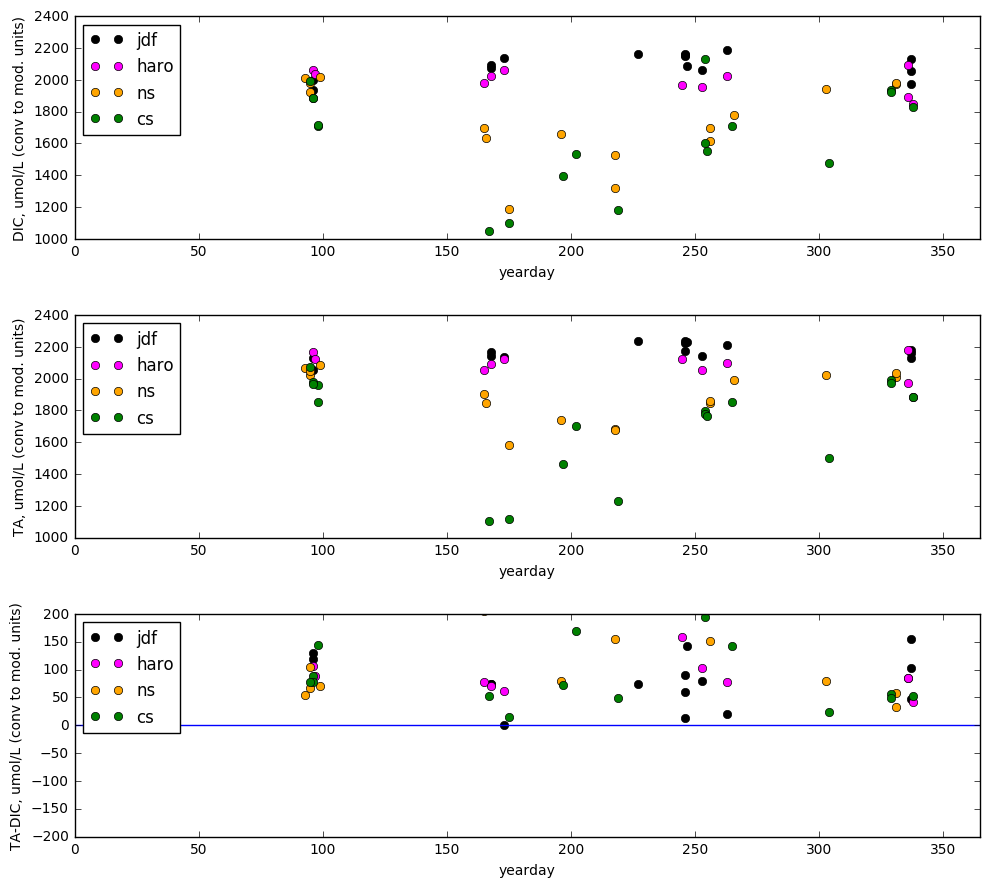

In [83]:
infil = loadtxt('../DATASETS/grl2016_edit2.txt')
infil_cor = loadtxt('../DATASETS/grl2016_nu.txt')

crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
mon = infil[:,4]
day = infil[:,5]
lat_or = infil[:,6]
lon_or = infil[:,7]
lat = infil_cor[:,6]
lon = infil_cor[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]

yr = np.zeros_like(mon)
yr[:] = 2014
# day_of_year = datetime.now().timetuple().tm_yday
dts = []
yds = []
for i in range(0,len(mon)):
    tyr = yr[i]
    tmon = mon[i]
    tday = day[i]
    tdt = dt.datetime(int(tyr),int(tmon),int(tday))
    dts.append(tdt)
    yd = tdt.timetuple().tm_yday
    yds.append(yd)
    
yds_ar = np.array(yds)

surf_dic = dic_conv[P<=5]
surf_yds = yds_ar[P<=5]

dic_jdf=dic_conv[(P<=5)&(loc_tag==1)] #black
dic_haro=dic_conv[(P<=5)&(loc_tag==4)] #fucksia
dic_ns =dic_conv[(P<=5)&(loc_tag==2)] #orange
dic_cs=dic_conv[(P<=5)&(loc_tag==3)]

yds_jdf=yds_ar[(P<=5)&(loc_tag==1)] #black
yds_haro=yds_ar[(P<=5)&(loc_tag==4)] #fucksia
yds_ns =yds_ar[(P<=5)&(loc_tag==2)] #orange
yds_cs=yds_ar[(P<=5)&(loc_tag==3)]

alk_jdf=alk_conv[(P<=5)&(loc_tag==1)] #black
alk_haro=alk_conv[(P<=5)&(loc_tag==4)] #fucksia
alk_ns =alk_conv[(P<=5)&(loc_tag==2)] #orange
alk_cs=alk_conv[(P<=5)&(loc_tag==3)]

fig = plt.figure(figsize=(10,9))
nop = 3
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(nop,1,i)
        ax.plot(yds_jdf,dic_jdf,c='black', marker='o',linestyle='None',label = 'jdf')
        ax.plot(yds_haro,dic_haro,c='fuchsia', marker='o',linestyle='None',label = 'haro')
        ax.plot(yds_ns,dic_ns,c='orange', marker='o',linestyle='None',label = 'ns')
        ax.plot(yds_cs,dic_cs,c='green', marker='o',linestyle='None',label = 'cs')
        ax.set_xlim([0,365])
        ax.set_ylim([1000,2400])
        ax.set_ylabel('DIC, umol/L (conv to mod. units)')
        ax.set_xlabel('yearday')
        ax.legend(loc='best')
        
    if i == 2:
        ax = fig.add_subplot(nop,1,i)
        ax.plot(yds_jdf,alk_jdf,c='black', marker='o',linestyle='None',label = 'jdf')
        ax.plot(yds_haro,alk_haro,c='fuchsia', marker='o',linestyle='None',label = 'haro')
        ax.plot(yds_ns,alk_ns,c='orange', marker='o',linestyle='None',label = 'ns')
        ax.plot(yds_cs,alk_cs,c='green', marker='o',linestyle='None',label = 'cs')
        ax.set_xlim([0,365])
        ax.set_ylim([1000,2400])
        ax.set_ylabel('TA, umol/L (conv to mod. units)')
        ax.set_xlabel('yearday')
        ax.legend(loc='best')
        
    if i == 3:
        ax = fig.add_subplot(nop,1,i)
        ax.plot(yds_jdf,alk_jdf-dic_jdf,c='black', marker='o',linestyle='None',label = 'jdf')
        ax.plot(yds_haro,alk_haro-dic_haro,c='fuchsia', marker='o',linestyle='None',label = 'haro')
        ax.plot(yds_ns,alk_ns-dic_ns,c='orange', marker='o',linestyle='None',label = 'ns')
        ax.plot(yds_cs,alk_cs-dic_cs,c='green', marker='o',linestyle='None',label = 'cs')
        ax.set_xlim([0,365])
        ax.set_ylim([-200,200])
        ax.plot([0,365],[0,0])
        ax.set_ylabel('TA-DIC, umol/L (conv to mod. units)')
        ax.set_xlabel('yearday')
        ax.legend(loc='best')

fig.tight_layout()


## DIC evaluation